In [1]:
# Persiapan, Memuat Data, dan Menghapus Duplikat (Menjawab Pertanyaan #1)
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Task 1: Identifikasi dan hapus duplikat (Jawaban Pertanyaan #1)
print(f"Jumlah baris sebelum hapus duplikat: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah hapus duplikat: {len(df)}")

Jumlah baris sebelum hapus duplikat: 65437
Jumlah baris setelah hapus duplikat: 65437


In [4]:
# Menangani Nilai Kosong (Menjawab Pertanyaan #2 & #3)
# Task 2 & 3: CodingActivities dengan Forward-fill (Sesuai instruksi Lab 10)
df['CodingActivities'] = df['CodingActivities'].ffill()

# Jawaban Pertanyaan #2 & #3 (Checklist): Menangani RemoteWork
missing_remote = df['RemoteWork'].isnull().sum()
print(f"Jumlah baris kosong di RemoteWork: {missing_remote}")

remote_mode = df['RemoteWork'].value_counts().idxmax()
df['RemoteWork'] = df['RemoteWork'].fillna(remote_mode)

# PENTING: Mengisi nilai kosong di ConvertedCompYearly sebelum normalisasi
# Baris ini yang tadi eror, pastikan tidak ada teks tambahan di belakangnya:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

print("Pengisian nilai kosong selesai!")

Jumlah baris kosong di RemoteWork: 10631
Pengisian nilai kosong selesai!


In [5]:
# Normalisasi Data Kompensasi (Menjawab Pertanyaan #4)
# Task 4: Identifikasi kolom kompensasi (Jawaban Pertanyaan #4)
target_col = 'ConvertedCompYearly'

# Task 5: Min-Max Scaling (Skala 0 sampai 1)
# Formula: $X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$
df['ConvertedCompYearly_MinMax'] = (df[target_col] - df[target_col].min()) / (df[target_col].max() - df[target_col].min())

# Task 6: Z-score Normalization (Mean 0, Std Dev 1)
# Formula: $Z = \frac{X - \mu}{\sigma}$
df['ConvertedCompYearly_Zscore'] = (df[target_col] - df[target_col].mean()) / df[target_col].std()

print("Normalisasi selesai.")

Normalisasi selesai.


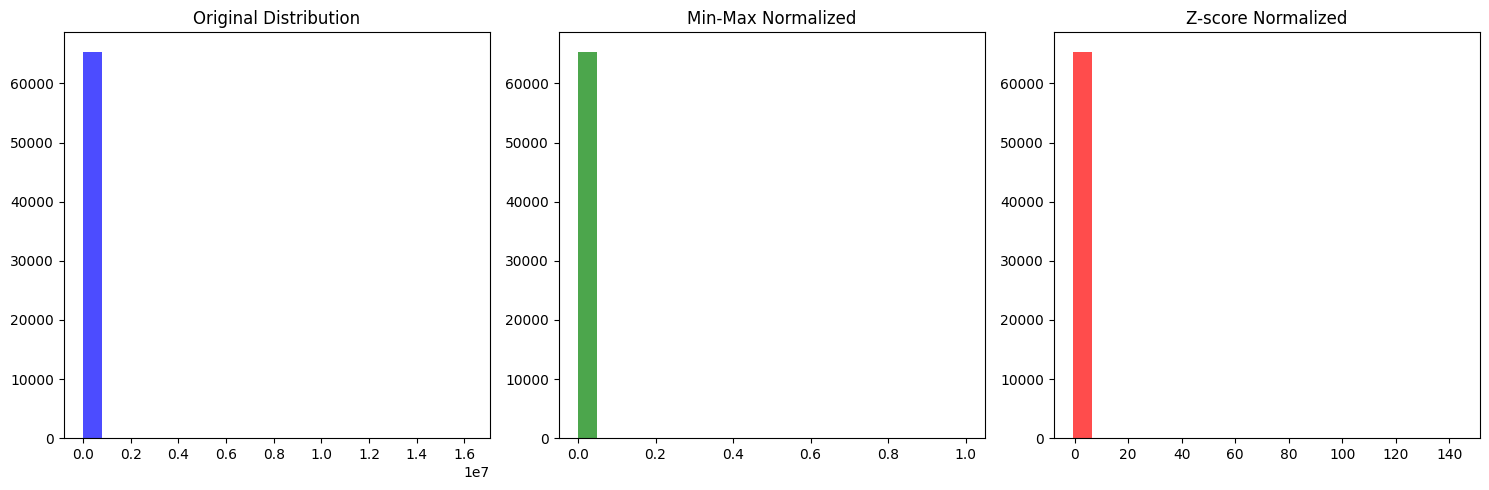

In [6]:
# Visualisasi Distribusi (Menjawab Pertanyaan #5)

# Task 7: Visualisasi Histogram (Jawaban Pertanyaan #5)
plt.figure(figsize=(15, 5))

# Plot Data Asli
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=20, color='blue', alpha=0.7)
plt.title('Original Distribution')

# Plot Min-Max
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=20, color='green', alpha=0.7)
plt.title('Min-Max Normalized')

# Plot Z-score
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=20, color='red', alpha=0.7)
plt.title('Z-score Normalized')

plt.tight_layout()
plt.show()